# Analyse multivariée

Ce chapitre est largement inspiré des ouvrages suivants.

- [Legendre, P. et Legendre, L. (2012). Numerical Ecology, Third English Edition. Elsevier.](https://www.elsevier.com/books/numerical-ecology/legendre/978-0-444-53868-0)
- [Borcard, D., Gillet, F. et Legendre, P. (2011). Numerical Ecology with R. Springer.](http://www.springer.com/us/book/9781441979759)

## Espaces d'analyse

### Abondance et occurence

L'abondance est le décompte d'espèces observées, tandis que l'occurence est la présence ou l'absence d'une espèce. Le tableau suivant contient des données d'abondance.

In [1]:
import pandas as pd
abundance = pd.DataFrame({'Bruant familier': [1, 0, 0, 3],
                         'Citelle à poitrine rousse': [1, 0, 0, 0],
                         'Colibri à gorge rubis': [0, 1, 0, 0],
                         'Geai bleu': [3, 2, 0, 0],
                         'Bruant chanteur': [1, 0, 5, 2],
                         'Chardonneret': [0, 9, 6, 0],
                         'Bruant à gorge blanche': [1, 0, 0, 0],
                         'Mésange à tête noire': [20, 1, 1, 0],
                         'Jaseur boréal': [66, 0, 0, 0]},
                        index = ['Site 1', 'Site 2', 'Site 3', 'Site 4'])
abundance

,Bruant chanteur,Bruant familier,Bruant à gorge blanche,Chardonneret,Citelle à poitrine rousse,Colibri à gorge rubis,Geai bleu,Jaseur boréal,Mésange à tête noire
Site 1,1,1,1,0,1,0,3,66,20
Site 2,0,0,0,9,0,1,2,0,1
Site 3,5,0,0,6,0,0,0,0,1
Site 4,2,3,0,0,0,0,0,0,0


L'**espace des espèces** (ou des variables ou descripteurs) est celui où les espèces forment les axes et où les sites sont positionnés dans cet espace. Il s'agit d'une perspective en *mode R*, qui permet principalement d'identifier quels espèces se retrouvent plus courrament ensemble

Populating the interactive namespace from numpy and matplotlib


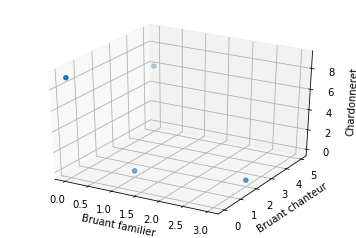

In [2]:
%pylab inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

species = ['Bruant familier', 'Bruant chanteur', 'Chardonneret']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(abundance[species[0]],
           abundance[species[1]],
           abundance[species[2]], marker='o')
ax.set_xlabel(species[0])
ax.set_ylabel(species[1])
ax.set_zlabel(species[2])

Dans l'**espace des sites** (ou les échantillons ou objets), on transpose la matrice d'abondance. On passe ici en *mode Q*, et l'on peut observer quels échantillons sont similaires.

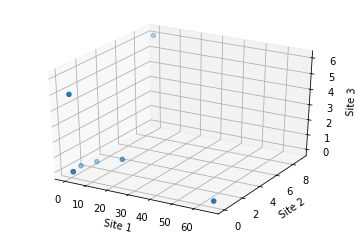

In [3]:
sites = abundance.index[0:3]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(abundance.T[sites[0]],
           abundance.T[sites[1]],
           abundance.T[sites[2]], marker='o')
ax.set_xlabel(sites[0])
ax.set_ylabel(sites[1])
ax.set_zlabel(sites[2])

### Environnement

L'**espace de l'environnement** comprend souvent un autre tableau contenant l'information sur l'environnement où se trouve les espèces: les coordonnées et l'élévation, la pente, le pH du sol, la pluviométrie, etc.

## Analyse d'association

Nous utiliserons le terme *association* come une **mesure pour quantifier la ressemblance ou la différence entre deux objets (échantillons) ou variables (descripteurs)**.

Alors que la corrélation et la covariance sont des mesures d'association entre des variables (analyse en *mode R*), la **similarité** et la **distance** sont deux types de une mesure d'association entre des objets (analyse en *mode Q*). Une distance de 0 est mesuré chez deux objets identiques. La distance augmente au fur et à mesure que les objets sont dissociés. Une similarité ayant une valeur de 0 indique aucune association, tandis qu'une valeur de 1 indique une association parfaite. À l'opposé, la dissimilarité est égale à 1-similarité.

La distance peut être liée à la similarité par la relation:

$$distance=\sqrt{1-similarité}$$

ou

$$distance=\sqrt{dissimilarité}$$

La racine carrée permet, pour certains indices de similarité, d'obtenir des propriétés euclédiennes. Pour plus de détails, voyez le tableau 7.2 de [Legendre et Legendre (2012)](https://www.elsevier.com/books/numerical-ecology/legendre/978-0-444-53868-0).

Les matrices d'association sont généralement présentées comme des matrices carrées, dont les dimensions sont égales au nombre d'objets (*mode Q*) ou de vrariables (*mode R*) dans le tableau. Chaque élément ("cellule") de la matrice est un indice d'association entre un objet (ou une variable) et un autre. Ainsi, la diagonale de la matrice est un vecteur nul (distance ou dissimilarité) ou unitaire (similarité), car elle correspond à l'association entre un objet et lui-même. 

Puisque l'association entre A et B est la même qu'entre B et A, et puisque la diagonale retourne une valeur convenue, il est possible d'exprimer une matrice d'association en mode "compact", sous forme de vecteur. Le vecteur d'association entre des objets A, B et C contiendra toute l'information nécessaire en un vecteur de trois chiffres, `[AB, AC, BC]`, plutôt qu'une matrice de dimension $3 \times 3$. L'impact sur la mémoire vive peut être considérable pour les calculs comprenant de nombreuses dimensions.

En Python, les calculs de similarité et de distances peuvent être effectués avec le module `scipy`. La fonction `pdist` permet de calculer les indices d'association en forme compact, que l'on peut étaler en forme carrée avec la fonction `squareform`.

Nous verons plus tard les méthodes de mesure de similarité et de distance plus loin. Pour l'instant, utilisons la méthode de *Jaccard* pour une démonstration sur des données d'occurence (présence=1, absence=0).

In [4]:
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets

occurence = (abundance > 0).astype(int)
squareform(pdist(occurence, 'jaccard'))

array([[ 0.        ,  0.77777778,  0.75      ,  0.71428571],
       [ 0.77777778,  0.        ,  0.6       ,  1.        ],
       [ 0.75      ,  0.6       ,  0.        ,  0.75      ],
       [ 0.71428571,  1.        ,  0.75      ,  0.        ]])

Remarquez que `scipy` retourne une matrice dont la diagonale est de 0La similarité d'un objet avec lui-même devrait être de 1. En fait, `scipy` retourne des dissimilarités, non pas des similarités. La matrice de distance serait donc calculée en extrayant la racine carrée des éléments de la matrice de dissimilarité:

In [5]:
dissimilarity = squareform(pdist(occurence, 'jaccard'))
distance = np.sqrt(dissimilarity)
distance

array([[ 0.        ,  0.8819171 ,  0.8660254 ,  0.84515425],
       [ 0.8819171 ,  0.        ,  0.77459667,  1.        ],
       [ 0.8660254 ,  0.77459667,  0.        ,  0.8660254 ],
       [ 0.84515425,  1.        ,  0.8660254 ,  0.        ]])

Dans le chapitre sur l'analyse compositionnelle, nous avons abordé les significations différentes que peuvent prendre le zéro. L'information fournie par un zéro peut être différente selon les circonstances. Dans le cas d'une variable continue, un zéro signifie généralement une mesure sous le seuil de détection. Deux tissus dont la concentration en cuivre est nulle ont une afinité sous la perspective de la concentration en cuivre. Dans le cas de mesures d'abondance (décompte) ou d'occurence (présence-absence), on pourra décrire comme similaires deux niches écologiques où l'on retrouve une espèce en particulier. Mais, inversement, ce serait dans la plupart des cas une erreur de décrire comme ressemblants deux sites où l'on ne retrouve pas une ou plusieurs espèces, c'est-à-dire deux sites où l'on a noté des 0 pour les espèces en question. En effet, il peut exister de nombreuses raisons écologiques et méthodologiques pour lesquelles l'espèces ou les espèces n'ont pas été observées. C'est le problème des **double-zéros**, problème qui est amplifié avec les grilles comprenant des espèces rares.

La ressemblance entre des objets comprenant des données continues devrait être calculée grâce à des indicateurs *symétriques*. Inversement, les affinités entre les objets décrits par des données d'abondance ou d'occurence susceptibles de générer des problèmes de double-zéros devraient être évaluées grâce à des indicateurs *asymétriques*. Un défi supplémentaire arrive lorsque les données sont de type mixte.

Nous utiliserons la convention de `scipy` et nous calculerons la dissimilarité, non pas la similarité. Les mesures de dissimilarité sont calculées sur des données d'abondance ou des données d'occurence. Notons qu'il existe beaucoup de confusion dans la littérature sur la manière de nommer les dissimilarités (ce qui n'est pas le cas des distances, dont les noms sont reconnus). Dans les sections suivantes, nous noterons la dissimilarité avec un $d$ minuscule et la distance avec un $D$ majuscule.

### Abondance

La **dissimilarité de Bray-Curtis** est asymétrique. Elle est aussi appelée l'indice de Steinhaus, de Czekanowski ou de Sørensen. Il est important de s'assurer de bien s'entendre la méthode à laquelle on fait référence. L'équation enlève toute ambiguité. La dissimilarité de Bray-Curtis entre les points A et B est calculée comme suit.

$$d_{AB} =  \frac {\sum \left| A_{i} - B_{i} \right| }{\sum \left(A_{i}+B_{i}\right)}$$

In [6]:
d_BrayCurtis = squareform(pdist(abundance, 'braycurtis'))
d_BrayCurtis

array([[ 0.        ,  0.94339623,  0.96190476,  0.95918367],
       [ 0.94339623,  0.        ,  0.44      ,  1.        ],
       [ 0.96190476,  0.44      ,  0.        ,  0.76470588],
       [ 0.95918367,  1.        ,  0.76470588,  0.        ]])

Une mannière visuellement plus intéressante de présenter une matrice d'association est un graphique de type *heatmap*, que le module `seaborn` permet de générer rapidement.

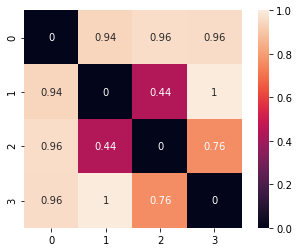

In [7]:
import seaborn as sns
sns.heatmap(d_BrayCurtis, annot=True, square=True)

La dissimilarité de Bray-Curtis est souvent utilisée dans la littérature. Toutefois, la version originale de Bray-Curtis, qui n'est pas tout à fait métrique (semimétrique). Conséquemment, la **dissimilarité de Ruzicka** (une variante de la dissimilarité de Jaccard pour les données d'abondance) est métrique, et devrait probablement être préféré à Bary-Curtis ([Oksanen, 2006](http://ocw.um.es/ciencias/geobotanica/otros-recursos-1/documentos/vegantutorial.pdf)).

$$d_{AB, Ruzicka} =  \frac { 2 \times d_{AB, Bray-Curtis} }{1 + d_{AB, Bray-Curtis}}$$

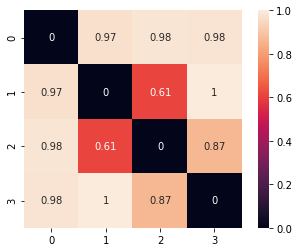

In [8]:
d_Ruzicka = d_BrayCurtis * 2 / (1+d_BrayCurtis)
sns.heatmap(d_Ruzicka, annot=True, square=True)

La **dissimilarité de Kulczynski** (aussi écrit Kulsinski) est asymétrique et semimétrique, tout comme celle de Bray-Curtis. Elle est calculée comme suit.

$$d_{AB} = 1-\frac{1}{2} \times \left[ \frac{\sum min(A_i, B_i)}{\sum A_i} + \frac{\sum min(A_i, B_i)}{\sum B_i} \right]$$

La fonction `kulsinski` de la version de `scipy` 0.19.1 ne donne pas les résultats qu'elle devrait ([rapport de bogue](https://github.com/scipy/scipy/pull/3163#issuecomment-34224341)).

In [9]:
# d_Kulczynski_WRONG = squareform(pdist(abundance, 'kulsinski'))

Une fonction maison peut être conçue.

In [10]:
def kulczynski(X):
    d_AB = []
    for i in range(X.shape[0]):
        sum_i = X.iloc[i, :].sum()
        for j in range(X.shape[0]):
            if (i>j):
                df_ = X.iloc[[i, j], :]
                min_ = df_.apply(min, axis=0).sum()
                sum_j = X.iloc[j, :].sum()
                d_AB.append(1-0.5*(min_/sum_i + min_/sum_j))
    return(d_AB)

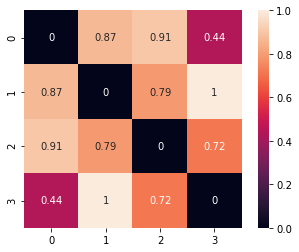

In [11]:
d_Kulczynski = squareform(kulczynski(abundance))
sns.heatmap(d_Kulczynski, annot=True, square=True)

Une approche commune pour mesurer l'association entre sites décrits par des données d'abondance est la **distance de Hellinger**. Notez qu'il s'agit ici d'une distance, non pas d'une dissimilarité. La première étape est de diviser chaque donnée d'abondance par l'abondance totale pour chaque site, puis d'extraire la racine carrée de chaque élément. Enfin, on calcule la distance euclidienne entre chaque site. Pour rappel, une distance euclidienne est la généralisation en plusieurs dimensions du théorème de Pythagore, $c = \sqrt{a^2 + b^2}$.

$$D_{AB} = \sqrt {\sum \left( \frac{A_i}{\sum A_i} - \frac{B_i}{\sum B_i} \right)^2}$$

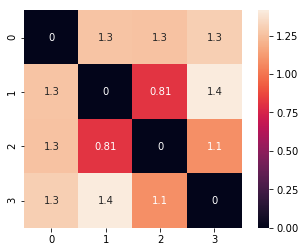

In [12]:
Hel_abundance = abundance.apply(lambda x: np.sqrt(x / np.sum(x)), axis=1)
D_Hellinger = squareform(pdist(Hel_abundance, 'euclidean'))
sns.heatmap(D_Hellinger, annot=True, square=True)

Toute comme la distance d'Hellinger, la **distance de chord** est calculée par une distance euclidienne sur des données d'abondance transformées de sorte que chaque ligne ait une longueur (norme) de 1.

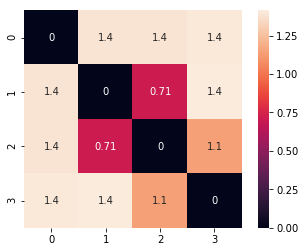

In [13]:
from sklearn.preprocessing import normalize
chord_abundance = normalize(abundance, axis=1)
D_chord = squareform(pdist(chord_abundance, 'euclidean'))
sns.heatmap(D_chord, annot=True, square=True)

La **métrique du chi-carré**, ou $\chi$-carré, ou chi-square, donne davantage de poids aux espèces rares qu'aux espèces communes. Son utilisation est recommandée lorsque les espèces rares sont de bons indicateurs de conditions écologiques particulières ([Legendre et Legendre, 2012](https://www.elsevier.com/books/numerical-ecology/legendre/978-0-444-53868-0), p. 308).

$$  d_{AB} = \sqrt{\sum _j \frac{1}{\sum y_j} \left( \frac{A_j}{\sum A} - \frac{B_j}{\sum B} \right)^2 }  $$

La métrique peut être transformée en distance en la multipliant par la racine carrée de la somme totale des espèces dans la matric d'abondance ($X$).

$$ D_{AB} = \sqrt{\sum X} \times d_{AB} $$

`scipy` n'offre pas les association du chi-carré dans sa trousse d'outil. Cette fonction fera le travail.

In [14]:
def chi_square(X, method='distance'):
    X = np.array(X)
    Xprop = np.apply_along_axis(func1d=lambda x: x / np.sum(x), axis=1, arr=X)
    y_plusj = X.sum(axis=0)
    D_AB = []
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if (i>j):
                element = np.zeros(X.shape[1])
                for species in range(X.shape[1]):
                    element[species] = (Xprop[i, species] - Xprop[j, species])**2 / y_plusj[species]
                if (method=='metric'):
                    D_AB.append(np.sqrt(element.sum()))
                elif (method=='distance'):
                    D_AB.append(np.sqrt(element.sum()) * np.sqrt(X.sum()))
                else:
                    print('Wrong method')
    return(D_AB)        

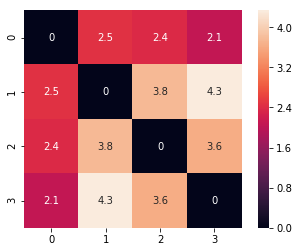

In [15]:
D_chisq = squareform(chi_square(abundance))
sns.heatmap(D_chisq, annot=True, square=True)

### Occurence (présence-absence)

Des indices d'association différents devraient être utilisés lorsque des données sont compilées sous forme booléenne. En général, les tableaux de données d'occurence seront compilés avec des 1 (présence) et des 0 (absence).

La **similarité de Jaccard** entre le site A et le site B est la proportion de double 1 (présences de 1 dans A et B) parmi les espèces. La dissimilarié est la proportion complémentaire (comprenant [1, 0], [0, 1] et [0, 0]). La distance de Jaccard est la racine carrée de la dissimilarité.

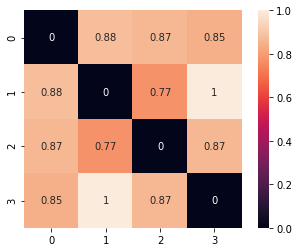

In [16]:
d_Jacc = squareform(pdist(occurence, 'jaccard'))
D_Jacc = np.sqrt(d_Jacc)
sns.heatmap(D_Jacc, annot=True, square=True)

Les **distances d'Hellinger, de chord et de chi-carré** sont aussi appropriées pour les calculs de distances sur des tableaux d'occurence.

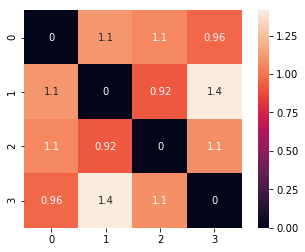

In [17]:
Hel_occurence = occurence.apply(lambda x: np.sqrt(x / np.sum(x)), axis=1)
D_Hellinger_o = squareform(pdist(Hel_occurence, 'euclidean'))
sns.heatmap(D_Hellinger_o, annot=True, square=True)

### Données quantitatives

Les données quantitative en écologie peuvent décrire l'état de l'environnement: le climat, l'hydrologie, l'hydrogéochimie, la pédologie, etc. En règle générale, les coordonnées des sites ne sot pas des variables environnementales, à que l'on soupçonne la coordonnée elle-même d'être responsable d'effets sur notre système: mais il s'agira la plupart du temps d'effets confondants (par exemple, on peut mesurer un effet de lattitude sur le rendement des agrumes, mais il s'agira probablement avant tout d'effets dus aux conditions climatiques, qui elles changent en fonction de la lattitude). D'autre types de données quantitative pouvant être appréhendées par des distances sont les traits phénologiques, les ionomes, les génomes, etc.

La **distance euclidienne** est la racine carrée de la somme des carrés des distances sur tous les axes. Il s'agit d'une application multidimensionnelle du théorème de Pythagore. La **distance d'Aitchison**, couverte dans le chapitre 6, est une distance euclidienne calculée sur des données compositionnelles préalablement transformées. La distance euclidienne est sensible aux unités utilisés: utiliser des milimètres plutôt que des mètres enflera la distance euclidienne. Il est recommandé de porter une attention particulière aux unités, et de standardiser les données au besoin (par exemple, en centrant la moyenne à zéro et en fixant l'écart-type à 1).

On pourrait, par exemple, mesurer la distance entre des observations des dimensions de différentes espèces d'iris. Ce tableau est inclu dans le module `scikit-learn`.

In [18]:
from sklearn import datasets
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

L'objet `iris.data` est une matrice, nom pas d'un tableau. Les noms des colonnes se trouvent dans l'objet `iris.feature_names`.

In [19]:
print(iris.feature_names)
iris.data[0:8, :]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2]])

Chaque colonne de la matrice est une mesure en centimètres. Pour éviter de donner davantage de poids aux longueur des sépales et en même temps de négliger la largeur des pétales, nous allons standardiser le tableau.

In [20]:
iris_s = np.apply_along_axis(func1d=lambda x: (x-np.mean(x))/np.std(x), axis=0, arr=iris.data)
print('Moyenne des colonnes', iris_s.mean(axis=0))
print('Écart-type des colonnes', iris_s.std(axis=0))

Moyenne des colonnes [ -4.73695157e-16  -6.63173220e-16   3.31586610e-16  -2.84217094e-16]
Écart-type des colonnes [ 1.  1.  1.  1.]


La standadrisation semble correcte. Notez que la fonction `apply_along_axis` de `numpy` ressemble à fonction `.axis` de `pandas.DataFrame`, à l'exception de la manière de l'appeler, de l'ordre et du nom des arguments.

Calculer la matrice de distance sur le tableau en entier ne devrait pas être une tâche ardue pour votre ordinateur. Mais par expérience, l'argument `annot=True` demande beaucoup de temps de calcul dans la génération du graphique. La valeur par défaut étant `False`, on peut seulement retirer l'argument.

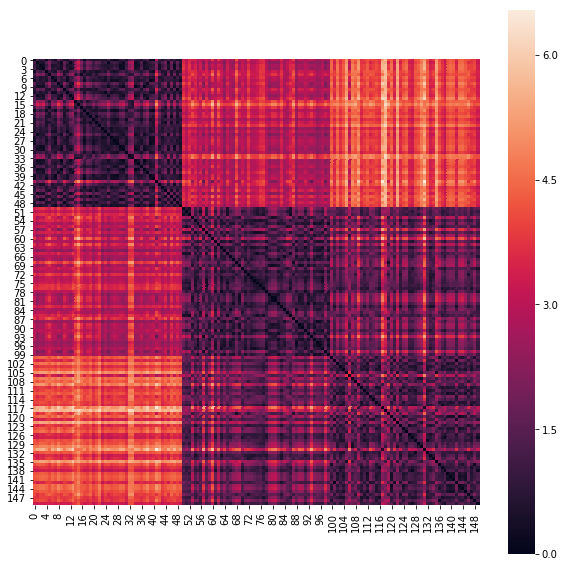

In [21]:
D_eucl = squareform(pdist(iris_s, 'euclidean'))
plt.figure(figsize=(10, 10))
sns.heatmap(D_eucl, square=True)

La **distance de Mahalanobis** est semblable à la distance euclidienne, mais qui tient compte de la covariance de la matrice des objets. Cette covariance peut être utilisée pour décrire la structure d'un nuage de points. La figure suivante montre deux points verts qui se trouvent aux extrêmes d'un nuage de point. Ces points ont des distances euclidiennes par rapport au centre différentes: les lignes d'équidistance euclédienne sont tracées en rose. Toutefois, les deux points ont un distance de Mahalanobis égale à partir du centre.

<img src="images/image5.png" width=400>
<p style="text-align: center">Source: [Parent et al. (2012)](https://www.intechopen.com/books/soil-fertility/nutrient-balance-as-paradigm-of-plant-and-soil-chemometricsnutrient-balance-as-paradigm-of-soil-and-).</p>

La distance de Mahalanobis permet de représenter des distances dans un espace fortement corrélé. Elle est courramment utilisée pour détecter les valeurs aberrantes selon des critères de distance à partir du centre d'un jeu de données multivariées.

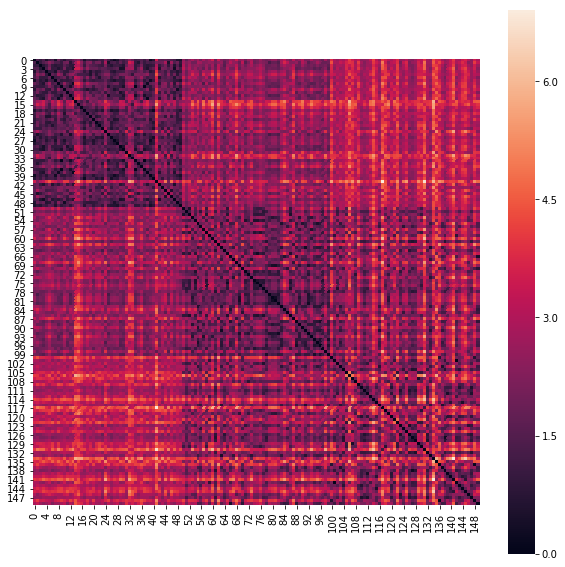

In [22]:
D_maha = squareform(pdist(iris.data, 'mahalanobis'))
plt.figure(figsize=(10, 10))
sns.heatmap(D_maha, square=True)

La **distance de Manhattan** porte aussi le nom de distance de cityblock ou de taxi. C'est la distance que vous devrez parcourir pour vous rendre du point A au point B à Manhattan, c'est-à-dire selon une séquence de tronçons perpendiculaires.

$$ D_{AB} = \sum _i \left| A_i - B_i \right| $$

La distance de Manhattan est appropriée lorsque les gradients (changements d'un état à l'autre ou d'une région à l'autre) ne permettent pas des changements simultanés.

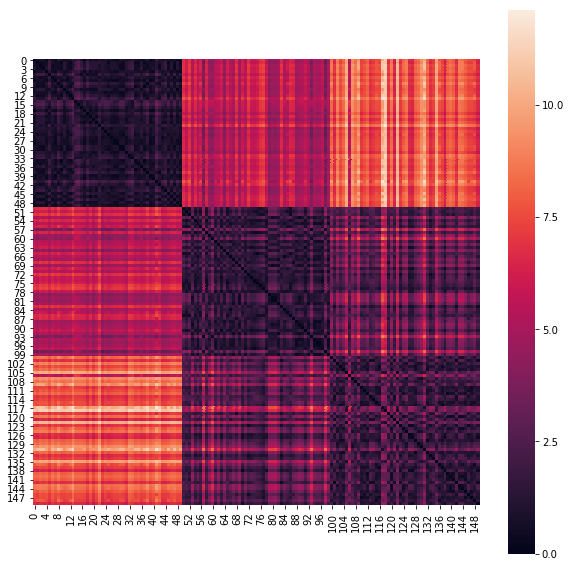

In [55]:
D_manha = squareform(pdist(iris.data, 'cityblock'))
plt.figure(figsize=(10, 10))
sns.heatmap(D_manha, square=True)

### Quelle distance choisir?

Il n'existe pas de règle claire. Cela dépend en premier lieu de vos données. Vous sélectionnerez votre méthode d'association selon le type de données que vous abordez, la question à laquelle vous désirez répondre, l'expérience dans la littérature (voire même dans vos réseaux). S'il n'existe pas de règle clair, c'est qu'il existe des dizaines de méthodes différentes, et la plupart d'entre elles vous donneront une perspective juste et valide. Il faut néanmoins faire attention pour éviter de sélectionner les méthodes qui ne sont pas appropriées. 

## Classification

Le partitionnement de données (*clustering* en anglais), ou inversement leur regroupement, permet de créer des ensembles selon leur association. Le partitionnement permet de créer des groupes selon l'information que l'on fait émerger des données. Les objets peuvent être classés selon leurs dimensions, leurs couleurs, leurs signature chimique, leurs comportements, leurs gènes, etc. 

Plusieurs méthodes sont aujourd'hui offertes aux analystes pour partiotionner leurs données. Dans le cadre de ce manuel, nous retenons deux grandes tendances dans les algorithmes.

1. *Méthodes hiérarchique et non hiérarchiques*. Dans partitionnement hiérarchique, l'ensemble des objets forme un groupe, comprenant des sous-regroupements, des sous-sous-regroupements, etc., dont les objets forment l'ultime partitionnement. On pourra alors identifier comment se décline un partitionnement. À l'inverse, un partitionnement non-hiérarchique demande à ce que le nombre de groupe soit préalablement fixé, puis des algorhitmes permettent de créer les groupes non hiérarchisés en faisant en sorte que les groupes soient les plus différents que possible.

2. *Agglomération ou division*. Pour créer des groupes hiérarchiques, on peut passer par l'agglomération: on regroupe les objets similaires jusqu'à créer un seul groupe. À l'inverse, la division consiste à partitionner les observations en sous-groupes jusqu'à ce que chaque groupe ne contienne qu'une seule observation.

3. *Membership exclusif ou flou*. Certaines techniques attribuent à chaque une classe unique: l'appartenance sera indiquée par un 1 et la non appartenance par un 0. D'autres techniques vont attribuer un membership flou où le degré d'appartenance est une variable continue de 0 à 1. Parmi les méthodes floues, on retrouve les méthodes probabilistes.

### Classification hiérarchique



#### Partitionnement

Le partitionnement hiérarchique est typiquement effectué avec une des quatres méthodes suivantes.

In [23]:
clustering_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

Chacune possède ses particularité.

**Single linkage**. Cette méthode est aglomérative. À chaque étape d'agglomération, on fusionne les deux groupes ayant le plus d'affinité sur la base des deux sous-groupes les plus rapprochés.

**Complete**. La méthode *complete* est aussi agglomérative.À la différence de la méthode *single*, on considère comme critère d'agglomération les éléments les plus éloignés.

**Average**. Cette méthode est aussi agglomérative, mais le regroupement est basé sur la moyenne du groupe plutôt que sur ses extrêmes.

**Median**. Plutôt que la moyenne, il est aussi possible d'utiliser un autre indicateur de tendance centrale: la médiane, réputée pour être plus robuste.

**Weighted**. 

**Centroid**. 

**Ward**. 

## Ordination

En écologie, biologie, agronommie comme en foresterie, la plupart des tableaux de données comprennent de nombreuses variables: pH, nutriments, climat, espèces ou cultivars, etc. L'ordination vise à mettre de l'ordre dans des données dont le nombre élevé de variables peut amener à des difficultés d'interprétaion ([Legendre et Legendre, 2012](https://www.elsevier.com/books/numerical-ecology/legendre/978-0-444-53868-0)). Plus précisément, le terme ordination est utilisé en écologie pour désigner les techniques de réduction d'axe.

L'analyse en composante principale est probablement la plus connue de ces techniques. De nombreuses techniques d'ordination ont été développées au cours des dernières années, chacune ayant ses domaines d'application. Ce manuel en couvrira quelques unes.

### Biplot

Pour créer un biplot, on juxtapose les descripteurs (variables), représentés par des flèches, et les objets (observations), représentés par des points. Les résultats d'une ordination peuvent être présentés selon deux types de biplots ([Legendre et Legendre, 2012](https://www.elsevier.com/books/numerical-ecology/legendre/978-0-444-53868-0)).

![](https://upload.wikimedia.org/wikipedia/commons/f/f6/Biplot_of_Anderson's_Iris_data_set.svg)
<center>Biplot effectué sur des données de dimension d'espèces d'iris. Source: [Wikipedia](https://en.wikipedia.org/wiki/Biplot)</center>

**Biplot de distance**. Ce type de projection permet de visualiser la position des objets entre eux et par rapport aux descripteurs et d'apprécier la contribution des descripteurs pour créer les composantes principales. Pour créer un biplot de distance, on projette directement les vecteurs propres ($U$) en guise de descripteurs. Pour ce qui est des objets, on utilise les scores de l'ACP ($F$). De cette manière, 

1. les distances euclidiennes entre les scores sont des approximations des distances euclidiennes dans l'espace multidimentionnel,
2. la projection d'un objet sur un descripteur perpendiculairement à ce dernier est une approximation de la position de l'objet sur le descripteur et
3. la projection d'un descripteur sur un axe principal est proportionnelle à sa contribution pour générer l'axe.

**Biplot de corrélation**. Cette projection permet d'apprécier les corrélations entre les descripteurs. Pour ce faire, les objets et les valeurs propres doivent être transformés. Pour générer les descripteurs, les vecteurs propres ($U$) doivent être multipliés par la matrice diagonalisée de la racine carrée des valeurs propres ($\Lambda$), c'est-à-dire $U \Lambda ^{\frac{1}{2}}$. En ce qui a trait aux objets, on multiplie les scores par ($F$) par la racine carrée négative des valeurs propres diagonalisées, c'est-à-dire $F \Lambda ^{- \frac{1}{2}}$. De cette manière, 

1. tout comme c'est le cas pour le biplot de distance, la projection d'un objet sur un descripteur perpendiculairement à ce dernier est une approximation de la position de l'objet sur le descripteur,
2. la projection d'un descripteur sur un axe principal est proportionnelle à son écart-type et
3. les angles entre les descripteurs sont proportionnelles à leur corrélation.

En d'autres mots, le bilot de distances devrait être utilisé pour apprécier la distance entre les objets et le biplot de corrélation devrait être utilisé pour apprécier les corrélations entre les descripteurs. Mais dans tous les cas, le type de biplot utilisé devrait être indiqué, au moins dans le titre de la figure.

Les fonctions suivantes permettront de créer des biplots en Python, grâce à la librairie graphique `matplotlib`. Nous les utiliserons plus loin.

In [24]:
from scipy.stats import f as ssf
def ellipse(X, level=0.95, method='deviation', npoints=100):
    cov_mat = np.cov(X.T)
    dfd = X.shape[0]-1
    dfn = 2
    center = np.apply_along_axis(np.mean, arr=X, axis=0) # np.mean(X, axis=0)
    if method == 'deviation':
        radius = np.sqrt(2 * ssf.ppf(q=level, dfn=dfn, dfd=dfd))
    elif method == 'error':
        radius = np.sqrt(2 * ssf.ppf(q=level, dfn=dfn, dfd=dfd)) / np.sqrt(X.shape[0])
    angles = (np.arange(0,npoints+1)) * 2 * np.pi/npoints
    circle = np.vstack((np.cos(angles), np.sin(angles))).T
    ellipse = center + (radius * np.dot(circle, np.linalg.cholesky(cov_mat).T).T).T
    return ellipse

In [25]:
def biplot(objects, eigenvectors, eigenvalues=None, 
           labels=None, scaling=1, xpc=0, ypc=1,
           group=None, plot_ellipses=False, axis_label='PC'):
    
    # select scaling
    if scaling == 1 or scaling == 'distance':
        scores = objects[:, [xpc, ypc]]
        loadings = eigenvectors[[xpc, ypc], :]
    elif scaling == 2 or scaling == 'correlation':
        scores = objects.dot(np.diag(eigenvalues**(-0.5)))[:, [xpc, ypc]]
        loadings = eigenvectors.dot(np.diag(eigenvalues**0.5))
    
    # draw the cross
    plt.axvline(0, ls='solid', c='k')
    plt.axhline(0, ls='solid', c='k')
    
    # draw the ellipses
    if group is not None and plot_ellipses:
        groups = np.unique(group)
        for i in range(len(groups)):
            mean = np.mean(scores[group==groups[i], :], axis=0)
            plt.text(mean[0], mean[1], groups[i],
                     ha='center', va='center', color='k', size=15)
            ell_dev = ellipse(X=scores[group==groups[i], :], level=0.95, method='deviation')
            ell_err = ellipse(X=scores[group==groups[i], :], level=0.95, method='error')
            plt.fill(ell_err[:,0], ell_err[:,1], alpha=0.6, color='grey')
            plt.fill(ell_dev[:,0], ell_dev[:,1], alpha=0.2, color='grey')
    
    # plot scores
    if group is None:
        plt.scatter(scores[:,xpc], scores[:,ypc])
    else:
        for i in range(len(np.unique(group))):
            cond = group == np.unique(group)[i]
            plt.plot(scores[cond, 0], scores[cond, 1], 'o')
    
    # plot loadings
    for i in range(loadings.shape[1]):
        plt.arrow(0, 0, loadings[xpc, i], loadings[ypc, i], 
                  color = 'black', head_width=np.ptp(objects)/100)
    
    # plot loading labels
    if labels is not None:
        for i in range(loadings.shape[1]):
            plt.text(loadings[xpc, i]*1.2, loadings[ypc, i]*1.2, labels[i], 
                     color = 'black', ha = 'center', va = 'center')
    
    # axis labels
    plt.xlabel(axis_label + str(xpc+1))
    plt.ylabel(axis_label + str(ypc+1))

### Ordination non contraignante
#### Analyse en composantes principales
ACP et LDA
https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html


NOTE. À insérer après avoir introduit les ACP, les vecteurs et valeurs propres.






L'ACP sera effectuée avec `scikit-learn`.

Malheureusement, les bibliothèques disponnibles en Python ne comprennent pas de fonctions pour générer des biplots en bonne et due forme. Heureusement, nous avons les connaissances et outils pour les générer. Effectuons un biplot sur les données de dimension des iris. 

In [26]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


Chargeons les données des iris.

In [27]:
from sklearn import datasets
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

Les données de l'objet `iris` sont enchâssées dans un dictionnaire. Les dimensions sont une matrice se situent sous la clé `data` et les noms des colonnes sont placés sous la clé `feature_names`.

In [29]:
X = iris.data
y = iris.target
labels = iris.feature_names

In [30]:
list(zip(['setosa', 'versicolor', 'virginica'], [0, 1, 2]))

[('setosa', 0), ('versicolor', 1), ('virginica', 2)]

In [31]:
y_name = []
for i in range(len(y)):
    if y[i] == 0:
        y_name.append('setosa')
    elif y[i] == 1:
        y_name.append('versicolor')
    elif y[i] == 2:
        y_name.append('virginica')
y_name = np.array(y_name)

Effectuons l'ACP et demandons le nombre maximum d'axes, égal au nombre de colonnes de la matrice.

In [32]:
pca = PCA(n_components=X.shape[1]).fit(X)

Les objets peuvent ensuite être calculés. 

In [33]:
X_r = pca.transform(X)

Les vecteurs et valeurs propres peuvent être récupérées.

In [34]:
eigenvectors_pca = pca.components_
eigenvalues_pca = pca.explained_variance_

NOTE. Analyse des valeurs propres.

In [35]:
pd.DataFrame(eigenvectors_pca, index=iris.feature_names)

,0,1,2,3
sepal length (cm),0.361590,-0.082269,0.856572,0.358844
sepal width (cm),0.656540,0.729712,-0.175767,-0.074706
petal length (cm),-0.580997,0.596418,0.072524,0.549061
petal width (cm),0.317255,-0.324094,-0.479719,0.751121


Les vecteurs propres devraient être de longueur unitaire.

In [36]:
np.linalg.norm(x=eigenvectors_pca, axis=1)

array([ 1.,  1.,  1.,  1.])

Lançons la fonction `biplot`, créée plus haut.

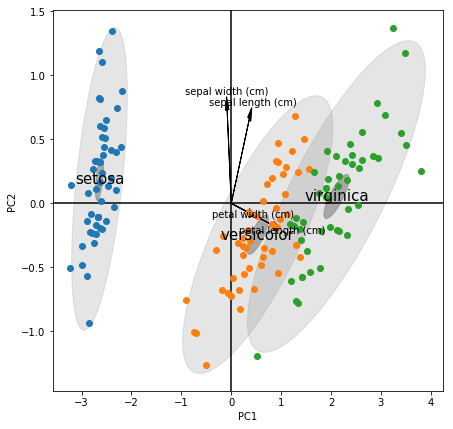

In [37]:
plt.figure(figsize=(7, 7))
biplot(objects=X_r,
       eigenvectors=eigenvectors_pca,
       eigenvalues=eigenvalues_pca,
       scaling='distance',
       labels=labels,
       xpc=0, ypc=1,
      group=y_name,
      plot_ellipses=True)

Les scores dans l'espace des composantes principales des trois espèces sont séparées en grande partie par la variable `petal_length`, et un peu moins par la variable `petal_width`. Les dimensions des sépales, qui créent en majeure partie le second axe principal, ne semblent pas bien séparer les groupes. Ceci peut d'ailleurs être confirmé par un aperçu des histogrammes.

In [38]:
import altair as al
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_m = iris_df.melt(id_vars='Species')
al.Chart(iris_m).mark_bar().encode(
    x=al.X('value', bin=al.Bin(maxbins=50.0), title='Mesure (cm)'),
    y='count(*)',
    column=al.Column('variable', title=' '),
    color='Species').configure_cell(height=200, width=190)

/home/essicolo/bin/anaconda3/lib/python3.6/site-packages/altair/utils/core.py:110: FutureWarning: pandas.lib is deprecated and will be removed in a future version.
You can access infer_dtype as pandas.api.types.infer_dtype
  typ = pd.lib.infer_dtype(data)


#### Analyse de correspondance

#### Analyse en coordonnées principales

#### Analyse manifold

### Ordination contraignante

Alors que l'ordination non contraignante vous permet de dresser un protrait de vos variables, l'ordination contraignante (ou canonique) permet de tester statistiquement ainsi que de représenter la relation entre plusieurs variables explicatives (par exemple, des conditions environnementales) et une ou plusieurs variables réponses (par exemple, les espèces observées). 

- L'analyse discriminante n'a fondamentalement qu'une seulement variable réponse, et celle-ci doit décrire l'appartenance à une catégorie.
- L'analyse canonique des corrélations sera préférée lorsque les variables sont étalées (comme les variables d'abondance).
- L'analyse de redondance sera préférée lorsque le nombre de variable est plus restreint (variables ionomiques et indicateurs de performance des cultures). Les détails, ainsi que les tenants et aboutissants de ces méthodes, sont présentés dans [Numerical Ecology (Legendre et Legendre, 2012)](https://www.elsevier.com/books/numerical-ecology/legendre/978-0-444-53868-0).

#### Analyse discriminante linéaire

...

Utilisons de nouveau les données d'iris.

In [39]:
X = iris.data
y = iris.target
labels = iris.feature_names

In [40]:
from sklearn import preprocessing
X_n = preprocessing.scale(X, axis=0)

In [41]:
X_n.std(axis=0)

array([ 1.,  1.,  1.,  1.])

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='eigen')
lda.fit(X=X_n, y=y_name)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='eigen', store_covariance=False, tol=0.0001)

In [43]:
objects_lda = lda.transform(X_n)
eigenvectors_lda = lda.scalings_.T
eigenvalues_lda = lda.explained_variance_ratio_

In [44]:
pd.DataFrame(lda.scalings_, index=iris.feature_names)

,0,1,2,3
sepal length (cm),0.149776,0.009529,0.256594,-0.844612
sepal width (cm),0.148173,0.327193,-0.174391,0.102779
petal length (cm),-0.851122,-0.574820,-0.802419,0.329028
petal width (cm),-0.480836,0.749957,0.509775,0.409643


In [45]:
eigenvectors_lda

array([[ 0.1497757 ,  0.14817298, -0.85112189, -0.48083628],
       [ 0.0095293 ,  0.32719336, -0.57482034,  0.74995684],
       [ 0.25659397, -0.17439117, -0.80241908,  0.50977531],
       [-0.84461196,  0.10277876,  0.32902823,  0.40964325]])

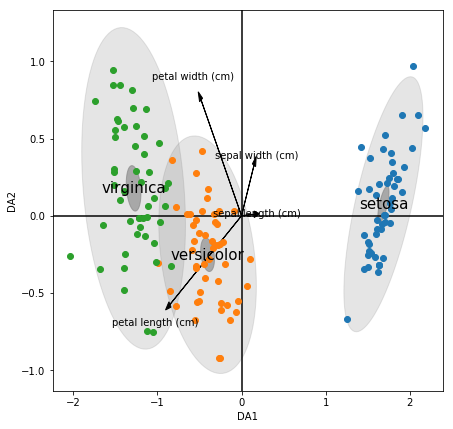

In [46]:
plt.figure(figsize=(7, 7))
biplot(objects=objects_lda,
       eigenvectors=eigenvectors_lda,
       labels=labels,
       axis_label = 'DA',
       group=y_name,
       plot_ellipses=True)

À la différence de l'ACP, l'ADL maximise la sépatation des groupes. Nous avions noté avec l'ACP que les dimensions des pétales distingaient les groupes. Puisque nous avions justement des informations sur les groupes, nous aurions pu procéder directement à un ADL pour obtenir des conclusions plus directes. Si la longueur des pétales permet de distinguer l'espèce *setosa* des deux autres, la largeur des pétales permet de distinguer *virginica* et *versicolor*, bien que les nuages de points se superposent. De manière bivariée, les régions de confiance des moyennes des scores discriminants (petites ellipses) montrent des différence significatives au seuil 0.05. 

#### Analyse canonique des corrélations

L'analyse canonique des corrélations a été à l'origine conçue pour étudier les liens entre des variables environnementales et l'abondance (décompte) ou l'occurence (présence-absence) d'espèces ([Ter Braak, 1986](https://www.ohio.edu/plantbio/staff/mccarthy/multivariate/terBraak1986.pdf)). Cette technique maximise la séparation entre les espèces. Plus on y ajoute de variables environnementales, plus l'ordination sera semblable à une ACP: il est donc conseillé de limiter le nombre de variables explicatives.

#### Analyse de redondance

En anglais, on la nomme *redundancy analysis*, souvent abrégée RDA. Elle est utilisée pour résumer les relations linéaires entre des variables réponse et des variables explicatives. La "redondance" se situe dans l'utilisation de deux tableaux de données contenant de l'information concordante. L'analyse de redondante est une manière élégante d'effectuer une régresssion linéaire multiple, où la matrice de valeurs prédites par la régression est assujettie à une analyse en composantes principales. Il est ainsi possible de superposer les scores des variables explicatives à ceux des variables réponse.



## RDA en Python

Les tableaux [`varespec`](https://rdrr.io/rforge/vegan/man/varespec.html) et [`varechem`](https://rdrr.io/rforge/vegan/man/varechem.html) comprennent respectivement des données d'abondance d'espèces et d'environnements (tirées du module [`vegan`](https://rdrr.io/rforge/vegan/), langage R).

In [47]:
import pandas as pd
from skbio.stats.ordination import rda, cca

In [48]:
varespec = pd.read_csv('data/varespec.csv', delimiter=';')
varechem = pd.read_csv('data/varechem.csv', delimiter=';')

Il est difficile d'appréhender. Comme nous l'avons vu précdemment, les données de concentration sont de type *compositionnelles*.

In [49]:
# TRANSFORMER EN CLR

In [50]:
cca_vare = cca(y=varespec, x=varechem, scaling=1)

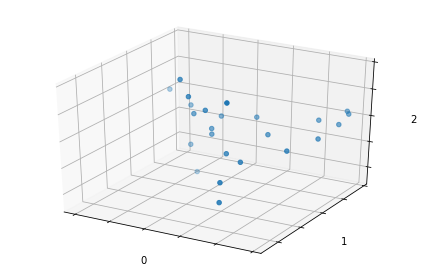

In [51]:
# cca_vare.features # species
# cca_vare.samples # sites
cca_vare

Pour représenter une RDA ou une CCA, on utilise souvent le triplot, qui comprend les sites (ici en noir), les variables réponse (rouge) et les variables explicatives (bleu).

(-3.3382849600003377, 2.584920755277718)

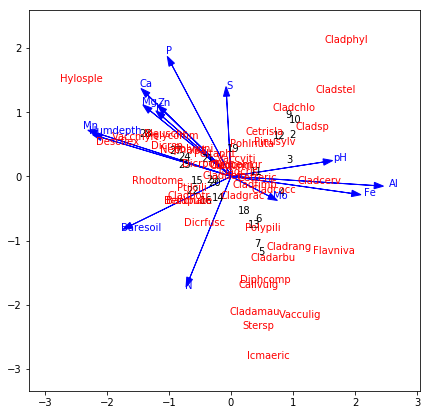

In [52]:
plt.figure(figsize=(7, 7))

# sites
for i in range(len(cca_vare.samples.index.values)):
    plt.text(x=cca_vare.samples.iloc[i,0], 
             y=cca_vare.samples.iloc[i,1], 
             s = cca_vare.samples.index.values[i], 
             color='black')

# species
for i in range(len(cca_vare.features.index.values)):
    plt.text(x=cca_vare.features.iloc[i,0], 
             y=cca_vare.features.iloc[i,1], 
             s = cca_vare.features.index.values[i], 
             color='red')

# scores
expand_scores = 3
margin_score_labels = 0.3
for i in range(len(cca_vare.biplot_scores.index.values)):
    plt.arrow(0, 0, 
              cca_vare.biplot_scores.iloc[i,0]*expand_scores, 
              cca_vare.biplot_scores.iloc[i,1]*expand_scores, 
              color = 'blue', head_width=.1)
    plt.text(x=cca_vare.biplot_scores.iloc[i,0]*(expand_scores + margin_score_labels), 
             y=cca_vare.biplot_scores.iloc[i,1]*(expand_scores + margin_score_labels), 
             s = cca_vare.biplot_scores.index.values[i], 
             color='blue')

# amalgamate all the values to define the limits in X and Y
allX = np.hstack((cca_vare.features.iloc[:,0], 
                  cca_vare.biplot_scores.iloc[:,0]*(expand_scores + margin_score_labels), 
                  cca_vare.samples.iloc[:,0]))
allY = np.hstack((cca_vare.features.iloc[:,1], 
                  cca_vare.biplot_scores.iloc[:,1]*(expand_scores + margin_score_labels), 
                  cca_vare.samples.iloc[:,1]))
margin_plot = 0.5

plt.xlim([np.min(allX)-margin_plot, np.max(allX)+margin_plot])
plt.ylim([np.min(allY)-margin_plot, np.max(allY)+margin_plot])

## Résumé

Tableau quelle analyse sélectionner? Faire un flow chart.